# i2b2 export analysis (v2)


In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# load data

In [63]:
# load data
case = pd.read_csv(
    "exports/v2_full/i2b2-export_patient-central-line-infection-500_20230911-044106.csv")
control = pd.read_csv(
    "exports/v2_full/i2b2-export_patient-central-line-500_20230911-042706.csv")

print("case", case.shape,"\n\t", case.columns.tolist())
print("control", control.shape, "\n\t",control.columns.tolist())

case[1:10]

case (500, 7) 
	 [' ', 'Patient ID', 'Sex', 'Age in Years', 'Race', 'Infection due to central venous catheter (ICD10:T80.21)', 'Unnamed: 6']
control (675, 7) 
	 [' ', 'Patient ID', 'Sex', 'Age in Years', 'Race', '[36555 - 36598] Central Venous Access Procedures', 'Unnamed: 6']


,,Patient ID,Sex,Age in Years,Race,Infection due to central venous catheter (ICD10:T80.21),Unnamed: 6
1,2,314213,FEMALE,-1,Black or African American,ICD9:999.31 = OTHER AND UNSPECIFIED INFECTION ...,NaN
2,3,485745,MALE,-1,White,ICD9:999.31 = OTHER AND UNSPECIFIED INFECTION ...,NaN
3,4,768783,MALE,-1,White,ICD9:999.32 = BLOODSTREAM INFECTION DUE TO CEN...,NaN
4,5,834924,FEMALE,58,White,ICD9:999.31 = OTHER AND UNSPECIFIED INFECTION ...,NaN
5,6,952102,FEMALE,71,Black or African American,ICD9:999.31 = OTHER AND UNSPECIFIED INFECTION ...,NaN
6,7,1063899,FEMALE,-1,White,ICD9:999.31 = OTHER AND UNSPECIFIED INFECTION ...,NaN
7,8,1321212,MALE,59,White,ICD9:999.31 = OTHER AND UNSPECIFIED INFECTION ...,NaN
8,9,1511102,MALE,-1,White,ICD9:999.31 = PICC LINE INFECTION (DIAGNOSIS:B...,NaN
9,10,1517611,FEMALE,-1,Black or African American,ICD9:999.31 = OTHER AND UNSPECIFIED INFECTION ...,NaN


# visualize data

## RACE

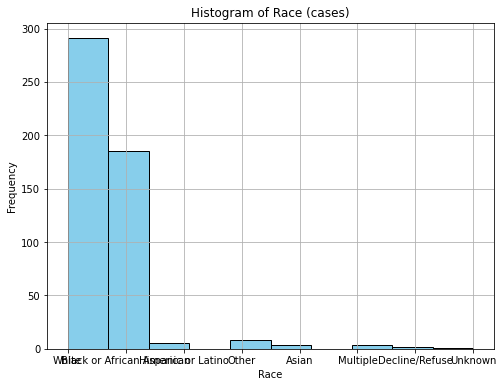

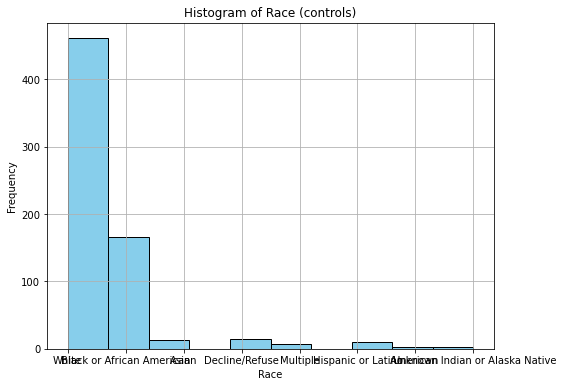

In [64]:
#
# RACE
#
# histograms
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.hist(case["Race"], color='skyblue', edgecolor='black')
plt.xlabel("Race")
plt.ylabel('Frequency')
plt.title(f'Histogram of Race (cases)')
plt.grid(True)
plt.show()

# controls 
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.hist(control["Race"], color='skyblue', edgecolor='black')
plt.xlabel("Race")
plt.ylabel('Frequency')
plt.title(f'Histogram of Race (controls)')
plt.grid(True)
plt.show()

## SEX

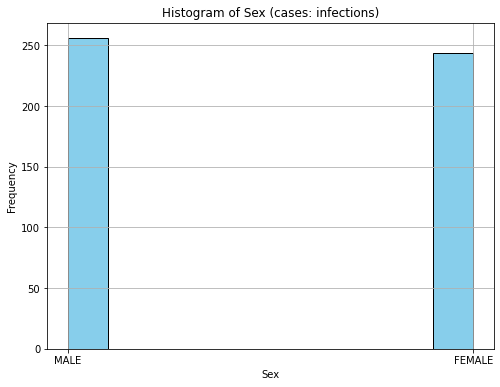

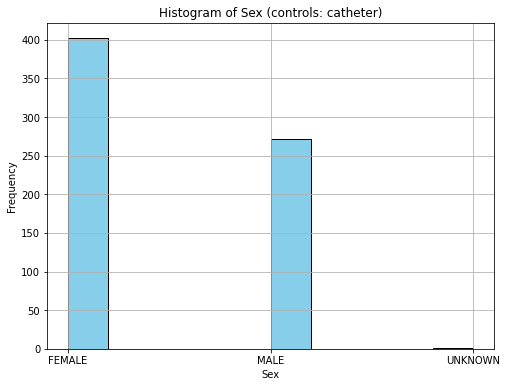

In [65]:
#
# SEX
#
# histograms
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.hist(case["Sex"], color='skyblue', edgecolor='black')
plt.xlabel("Sex")
plt.ylabel('Frequency')
plt.title(f'Histogram of Sex (cases: infections)')
plt.grid(True)
plt.show()

# controls 
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.hist(control["Sex"], color='skyblue', edgecolor='black')
plt.xlabel("Sex")
plt.ylabel('Frequency')
plt.title(f'Histogram of Sex (controls: catheter)')
plt.grid(True)
plt.show()

## Age

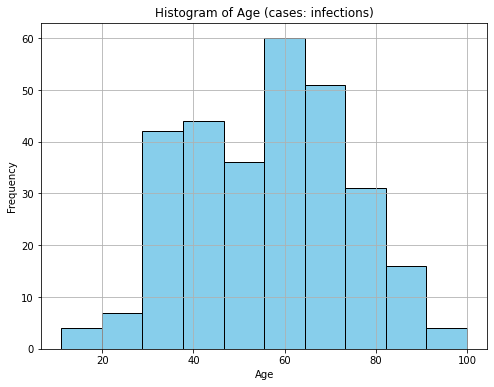

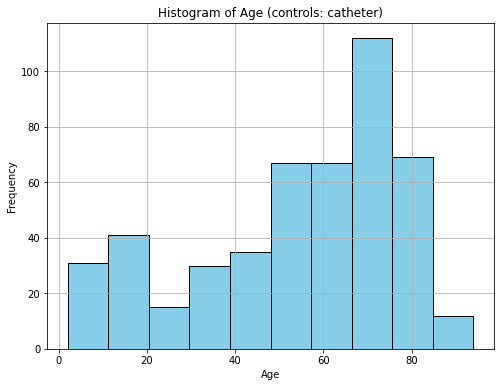

In [66]:
#
# Age
#

# remove -1 (no data)
caseWage = case[case["Age in Years"] != -1]
controlWage = control[control["Age in Years"] != -1]
                             
# histograms
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.hist(caseWage["Age in Years"], color='skyblue', edgecolor='black')
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.title(f'Histogram of Age (cases: infections)')
plt.grid(True)
plt.show()

# controls 
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.hist(controlWage["Age in Years"], color='skyblue', edgecolor='black')
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.title(f'Histogram of Age (controls: catheter)')
plt.grid(True)
plt.show()

cases
controls


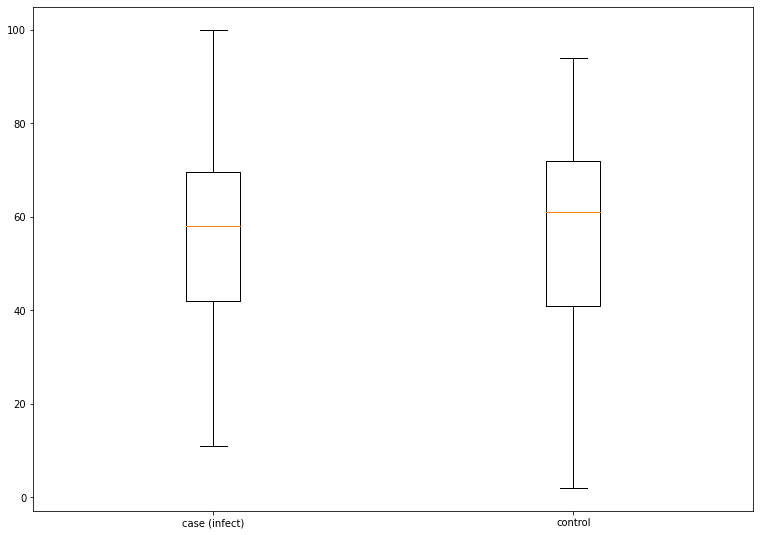

In [67]:
import scipy.stats as stats
print("cases")
caseWage["Age in Years"].agg(["count", "min", "max", "median", "mean", "skew"])
print("controls")
controlWage["Age in Years"].agg(["count", "min", "max", "median", "mean", "skew"])

boxDf = [caseWage["Age in Years"], controlWage["Age in Years"]]

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(boxDf)

ax.set_xticklabels(['case (infect)', 'control'])
plt.show()

## Mann-Whitney U test for stat diff in dist

In [68]:
ageResult = stats.mannwhitneyu(list(caseWage['Age in Years']), list(controlWage['Age in Years']))
print(ageResult)
if ageResult.pvalue < 0.05: 
    print("Statistically DIFFERENT")
else: 
    print("Statistically the same")


MannwhitneyuResult(statistic=69414.0, pvalue=0.6818903792011757)
Statistically the same


## Try logistical regression

In [69]:
# load libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [70]:
#
# convert categorical to integer
#
caseY = caseWage.copy()
caseY["infection"] = 1
controlY = controlWage.copy()
controlY["infection"] = 0
caseControl =pd.concat([caseY, controlY])


In [71]:

# Load your dataset into X (features) and y (target variable)
# Example:
# X = your_features (column names)
# y = your_target_variable: infection or none

# Split the dataset into training and testing sets
columnsList = caseControl[['Sex','Age in Years','Race']]
df = pd.get_dummies(caseControl, 
                             columns=["Sex","Race"], 
                             drop_first=True)




In [72]:
caseControl.columns.tolist()

[' ',
 'Patient ID',
 'Sex',
 'Age in Years',
 'Race',
 'Infection due to central venous catheter (ICD10:T80.21)',
 'Unnamed: 6',
 'infection',
 '[36555 - 36598] Central Venous Access Procedures']

In [73]:
df.columns.tolist()

[' ',
 'Patient ID',
 'Age in Years',
 'Infection due to central venous catheter (ICD10:T80.21)',
 'Unnamed: 6',
 'infection',
 '[36555 - 36598] Central Venous Access Procedures',
 'Sex_MALE',
 'Race_Asian',
 'Race_Black or African American',
 'Race_Decline/Refuse',
 'Race_Hispanic or Latino',
 'Race_Multiple',
 'Race_Other',
 'Race_Unknown',
 'Race_White']

In [74]:
# Define your outcome variable (continuous) and predictor variables
X = df[["Age in Years",
        'Sex_MALE',
        'Race_Asian',
        'Race_Black or African American',
        'Race_Decline/Refuse',
        'Race_Hispanic or Latino',
        'Race_Multiple',
        'Race_Other',
        'Race_White']]
y = df['infection']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logistic_reg = LogisticRegression()

# Fit the model to the training data
logistic_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)


Accuracy: 0.6258064516129033
Confusion Matrix:
 [[89  8]
 [50  8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.92      0.75        97
           1       0.50      0.14      0.22        58

    accuracy                           0.63       155
   macro avg       0.57      0.53      0.49       155
weighted avg       0.59      0.63      0.55       155

